<a href="https://colab.research.google.com/github/x-xinn/2106143_Yasin/blob/main/clastering%20klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score

dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
from re import X
X = dataset.iloc[:, :4]
y = dataset['Species']

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
dt = DecisionTreeClassifier()
dt.fit(XTrain, yTrain)

DecisionTreeClassifier()

In [11]:
print('Decision Tree Accuracy : {:.3f}'.format(accuracy_score(yTest, dt.predict(XTest))))

Decision Tree Accuracy : 0.978


[Text(0.6, 0.8333333333333334, 'x[0] <= 101.0\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.4, 0.5, 'x[0] <= 50.5\ngini = 0.5\nsamples = 66\nvalue = [34, 32, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]')]

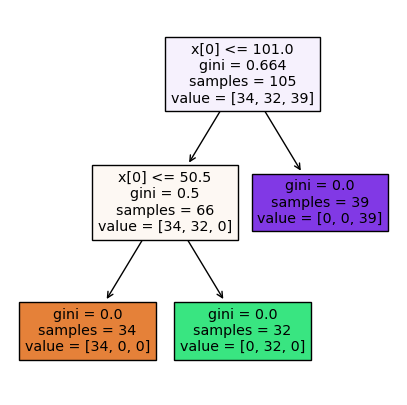

In [12]:
plt.figure(figsize=(5,5))
tree.plot_tree(dt, filled=True)

In [13]:
kMeans = KMeans(n_clusters=3)
labels = kMeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
db_score = davies_bouldin_score(X, labels)
print(db_score)

0.5015328822764351


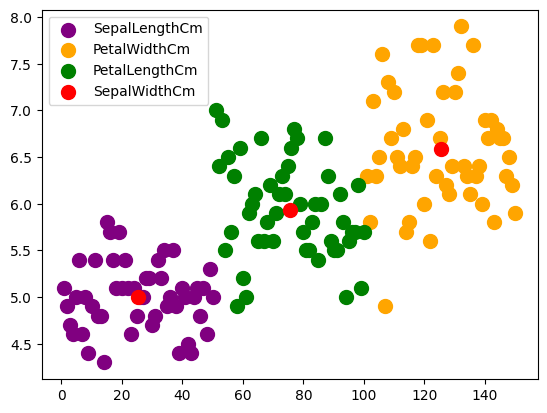

In [15]:
cols = dataset.columns
plt.scatter(X.loc[labels == 0, cols[0]],
      X.loc[labels == 0, cols[1]], 
      s=100,c='purple',
      label='SepalLengthCm')
plt.scatter(X.loc[labels == 1, cols[0]],
      X.loc[labels == 1, cols[1]], 
      s=100, c='orange',
      label='PetalWidthCm')
plt.scatter(X.loc[labels == 2, cols[0]],
      X.loc[labels == 2, cols[1]], 
      s=100, c='green',
      label='PetalLengthCm')
plt.scatter(kMeans.cluster_centers_[:, 0],
      kMeans.cluster_centers_[:, 1],
      s=100, c='red',
      label='SepalWidthCm')
plt.legend()